# Projet épidémie MODÈLE SIR

## Equations du modèle SIR
Le modèle SIR est défini par les équations différentielles suivantes :
$$
\begin{cases}
\frac{dS}{dt} = -\beta {S I} \\
\frac{dI}{dt} = \beta {S I} - \gamma I \\
\frac{dR}{dt} = \gamma I
\end{cases}
$$
où :
- $S(t)$ : nombre de susceptibles à l'instant $t$
- $I(t)$ : nombre d'infectés à l'instant $t$
- $R(t)$ : nombre de guéris à l'instant $t$
- $\beta$ : taux de transmission
- $\gamma$ : taux de guérison
- $N$ : population totale (constante)   


Calculons différents paramètres analytiquement, comme $I_{max}$ (le nombre maximum d'infectés) et $t_{max}$ (le temps auquel ce maximum est atteint), ou encore $S_{\infty}$ (le nombre de susceptibles à la fin de l'épidémie). Nous calculerons aussi le nombre de reproduction de base $R_0$ en démontrant son expression à partir des équations du modèle. Nous comparerons ensuite ces résultats analytiques avec les résultats numériques obtenus par la méthode de Runge-Kutta.



### I_max et t_max
Pour trouver le nombre maximum d'infectés $I_{max}$ et le temps $t_{max}$ auquel ce maximum est atteint, nous devons analyser l'équation pour $I(t)$ :
$$\frac{dI}{dt} = \beta {S I}- \gamma I$$
Le maximum d'infectés se produit lorsque $\frac{dI}{dt} = 0$, ce qui implique :
$$\beta {S I} - \gamma I = 0$$
En factorisant $I$, nous obtenons :
$$I \left( \beta {S} - \gamma \right) = 0$$
Cela signifie que soit $I = 0$ (ce qui correspond à l'absence d'infectés), soit :
$$\beta {S} - \gamma = 0$$
En résolvant pour $S$, nous trouvons :
$$S = \frac{\gamma}{\beta}$$
Ce qui correspond au nombre de susceptibles lorsque le nombre d'infectés est à son maximum. Pour trouver $I_{max}$, nous pouvons utiliser la conservation de la population :
$$N = S + I + R$$
Au temps $t_{max}$, nous avons :
$$N = \frac{\gamma}{\beta} + I_{max} + R$$
En supposant que $R$ est négligeable au moment où $I$ est à son maximum, nous pouvons approximativement écrire :
$$I_{max} \approx N - \frac{\gamma}{\beta} = N \left( 1 - \frac{\gamma}{\beta} \right)$$
Le temps $t_{max}$ peut être trouvé en intégrant les équations du modèle, mais il n'existe pas de solution analytique simple pour $t_{max}$ en fonction de $\beta$ et $\gamma$. Cependant, il peut être estimé numériquement à partir de la solution des équations différentielles.

On trouve pour $S_{\infty}$ :
$$S_{\infty} = - \frac{\gamma}{\beta} W\left( -\frac{\beta}{\gamma} e^{-\frac{\beta N}{\gamma}}S_0\right)$$

Ou encore une autre expression pour $S_{\infty}$ :
$$S_{\infty} = S_0 e^{-\frac{\beta}{\gamma}(N - S_{\infty})}$$

In [27]:
# code pour trouver S_infini en trouvant le minimum de la fonction S_inf = S_0 e^(-beta/gamma * (N - S_inf)) en la tracant et en trouvant le point d'intersection avec la droite S_inf = S_inf

S_0 = 1  # Nombre initial de susceptibles
beta = 0.1  # Taux de transmission
gamma = 0.5  # Taux de guérison
N = 1000     # Population totale

def S_inf(S_inf):
    return S_0 * np.exp(-beta/gamma * (N - S_inf)) - S_inf
import numpy as np
import matplotlib.pyplot as plt
S_inf_values = np.linspace(0, S_0, 100)
S_inf_results = [S_inf(S_inf) for S_inf in S_inf_values]
plt.plot(S_inf_values, S_inf_results, label='S_inf(S_inf)')
plt.plot(S_inf_values, S_inf_values, label='S_inf = S_inf', linestyle='--')
plt.xlabel('S_inf')
plt.ylabel('S_inf(S_inf)')
plt.title('Tracé de S_inf(S_inf) et S_inf = S_inf')
plt.legend()
plt.grid()
plt.show()

TypeError: 'numpy.float64' object is not callable

### Calcul du nombre de reproduction de base $R_0$
Le nombre de reproduction de base $R_0$ est défini comme le nombre moyen d'infections secondaires produites par un individu infecté dans une population entièrement susceptible. Pour le modèle SIR, $R_0$ peut être calculé à partir des paramètres $\beta$ et $\gamma$.
Considérons un individu infecté. Le taux de transmission est $\beta$, ce qui signifie que cet individu infecte en moyenne $\beta$ personnes par unité de temps. La durée moyenne pendant laquelle un individu reste infecté est donnée par $1/\gamma$, car $\gamma$ est le taux de guérison. Par conséquent, le nombre moyen d'infections secondaires produites par un individu infecté est :
$$R_0 = \beta \times \frac{1}{\gamma} = \frac{\beta}{\gamma}$$
Ainsi, le nombre de reproduction de base $R_0$ est égal au rapport entre le taux de transmission $\beta$ et le taux de guérison $\gamma$. Si $R_0 > 1$, l'infection peut se propager dans la population, tandis que si $R_0 < 1$, l'infection tend à disparaître.

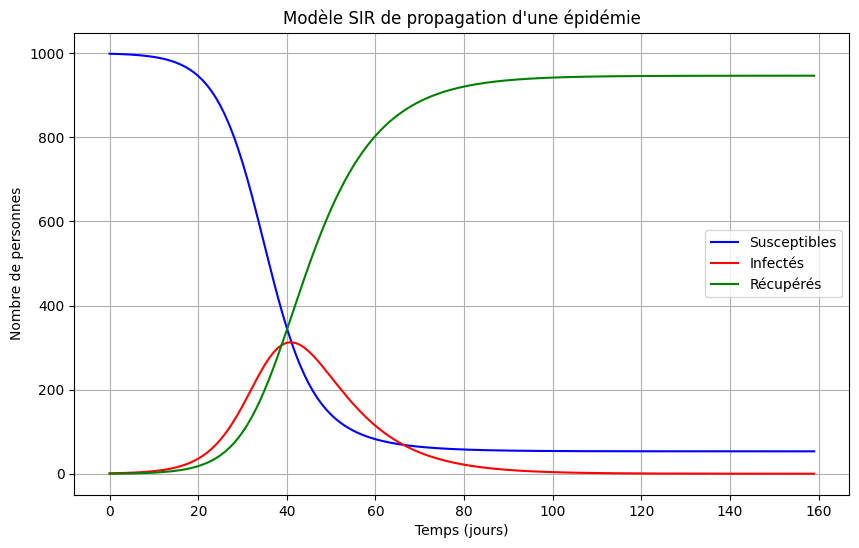

In [3]:

# paramètres
beta = 0.3  # taux de transmission
gamma = 0.1  # taux de récupération
N = 1000  # population totale
I0 = 1  # nombre initial d'infectés
R0 = 0  # nombre initial de récupérés
S0 = N - I0 - R0  # nombre initial de susceptibles
t_max = 160  # durée de la simulation en jours
dt = 1  # pas de temps en jours

import numpy as np
import matplotlib.pyplot as plt

# initialisation des tableaux
t = np.arange(0, t_max, dt)
S = np.zeros(len(t))
I = np.zeros(len(t))
R = np.zeros(len(t))
# conditions initiales
S[0] = S0
I[0] = I0
R[0] = R0
# simulation
for i in range(1, len(t)):
    dS = -beta * S[i-1] * I[i-1] / N
    dI = beta * S[i-1] * I[i-1] / N - gamma * I[i-1]
    dR = gamma * I[i-1]
    S[i] = S[i-1] + dS * dt
    I[i] = I[i-1] + dI * dt
    R[i] = R[i-1] + dR * dt
# affichage des résultats
plt.figure(figsize=(10,6))
plt.plot(t, S, label='Susceptibles', color='blue')
plt.plot(t, I, label='Infectés', color='red')
plt.plot(t, R, label='Récupérés', color='green')
plt.xlabel('Temps (jours)')
plt.ylabel('Nombre de personnes')
plt.title('Modèle SIR de propagation d\'une épidémie')
plt.legend()
plt.grid()
plt.show()

Pour le modèle SIR, on a les équations différentielles suivantes pour les infections $S(t)$, les individus infectés $I(t)$ et les individus guéris $R(t)$ :

$$\frac{dS}{dt} = -\beta S(t) I(t) + \mu R(t)$$
$$\frac{dI}{dt} = \beta S(t) I(t) - \gamma I(t)$$
$$\frac{dR}{dt} = \gamma I(t) - \mu R(t)$$

avec $\beta$ le taux d'infection et $\gamma$ le taux de récupération/mort.
Le terme $\mu R(t)$ dans réprésente les guéris perdant leur immunité et devenant susceptible. 

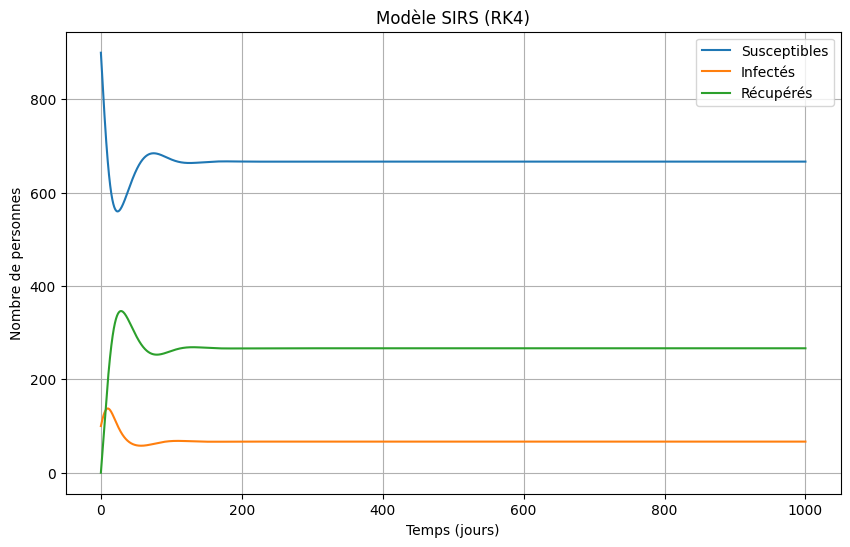

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Exemple paramètres
beta = 0.3
gamma = 0.2
delta = 0.05

S0, I0, R0 = 900, 100, 0
N = S0 + I0 + R0

t0, tf, N_temps = 0.0, 1000, 7201
t = np.linspace(t0, tf, N_temps)
dt = t[1] - t[0]

def sirs_model(y, t, beta, gamma, delta):
    S, I, R = y
    dSdt = -beta * S * I / N + delta * R
    dIdt =  beta * S * I / N - gamma * I
    dRdt =  gamma * I - delta * R
    return np.array([dSdt, dIdt, dRdt], dtype=float)

def runge_kutta_4(f, y0, t, beta, gamma, delta):
    y0 = np.array(y0, dtype=float)
    y = np.zeros((len(t), len(y0)), dtype=float)
    y[0] = y0
    dt = t[1] - t[0]

    for i in range(1, len(t)):
        k1 = f(y[i-1], t[i-1], beta, gamma, delta)
        k2 = f(y[i-1] + 0.5 * dt * k1, t[i-1] + 0.5 * dt, beta, gamma, delta)
        k3 = f(y[i-1] + 0.5 * dt * k2, t[i-1] + 0.5 * dt, beta, gamma, delta)
        k4 = f(y[i-1] + dt * k3,       t[i-1] + dt,       beta, gamma, delta)

        y[i] = y[i-1] + (dt/6.0) * (k1 + 2*k2 + 2*k3 + k4)

    return y

y0 = [S0, I0, R0]
sirs_results = runge_kutta_4(sirs_model, y0, t, beta, gamma, delta)

S_sirs, I_sirs, R_sirs = sirs_results[:,0], sirs_results[:,1], sirs_results[:,2]

plt.figure(figsize=(10,6))
plt.plot(t, S_sirs, label='Susceptibles')
plt.plot(t, I_sirs, label='Infectés')
plt.plot(t, R_sirs, label='Récupérés')
plt.xlabel('Temps (jours)')
plt.ylabel("Nombre de personnes")
plt.title("Modèle SIRS (RK4)")
plt.legend()
plt.grid(True)
plt.show()


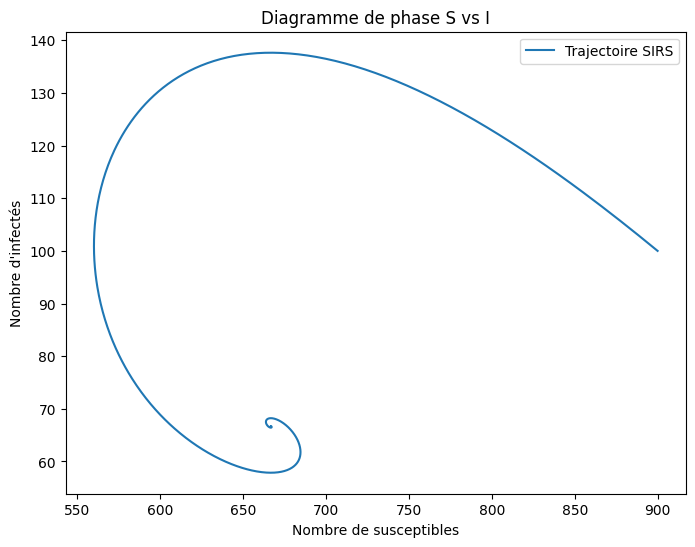

In [10]:
# diagramme de phase S vs I
plt.figure(figsize=(8,6))
plt.plot(S_sirs, I_sirs, label='Trajectoire SIRS')
plt.xlabel('Nombre de susceptibles')
plt.ylabel('Nombre d\'infectés')
plt.title('Diagramme de phase S vs I')
plt.legend()    

## Calcul analytique des points d'équilibre

Les points d'équilibre sont obtenus en posant les dérivées à zéro :
$$0 = -\beta S I/N + \mu R$$
$$0 = \beta S I/N - \gamma I$$
$$0 = \gamma I - \mu R$$

Résolvons ces équations pour trouver les points d'équilibre.
1. De la deuxième équation, on a $I(\beta S/N - \gamma) = 0$. Donc soit $I=0$ soit $S = \gamma N / \beta$.
2. Si $I=0$, alors de la première équation, $0 = \mu R$, donc $R=0$. Le point d'équilibre est alors $(S, I, R) = (N, 0, 0)$. Ce point correspond à l'absence d'infection.
3. Si $S = \gamma N / \beta$, alors de la troisième équation, $R = \gamma I / \mu$. En substituant dans la première équation, on obtient $0 = -\beta (\gamma N / \beta) I/N + \mu (\gamma I / \mu)$, ce qui est vérifié pour tout $I$. Ainsi, il existe une famille de points d'équilibre de la forme $(\gamma N / \beta, I, \gamma I / \mu)$ pour tout $I \geq 0$.